In [1]:
cd /home/ahern/projects/aa/rf_diffusion_flow

/home/ahern/projects/aa/rf_diffusion_flow


In [2]:
from rf_diffusion.dev import pymol
# pymol.init('http://10.64.100.67:9123')

import glob
import math
import os
from importlib import reload
from rf_diffusion.dev import pymol
from rf_diffusion.dev import analyze
cmd = analyze.cmd

import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rf_diffusion import metrics
from omegaconf import DictConfig, OmegaConf
from rf_diffusion.benchmark import compile_metrics

from rf_diffusion import aa_model
from rf_diffusion.dev import show_bench
from rf_diffusion.dev import show_tip_pa
import tree
import torch
from icecream import ic

from rf_diffusion.dev import benchmark as bm

[Using backend: pytorch
15:34:13] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: /home/ahern/.conda/envs/se3/lib/python3.9/site-packages/dgl/tensoradapter/pytorch/libtensoradapter_pytorch_1.13.1.so: cannot open shared object file: No such file or directory


initializing analyze, cmd: <rf_diffusion.dev.pymol.XMLRPCWrapperProxy object at 0x7fb2c45bcb50>


In [3]:
reload(analyze)
reload(bm)
df = analyze.combine(
    # '/net/scratch/ahern/se3_diffusion/benchmarks/2023-12-13_02-40-19_sh_benchmark_1_bb_both//compiled_metrics.csv',
    '/net/scratch/ahern/se3_diffusion/benchmarks/minimal_5/compiled_metrics.csv'
)

bm.add_cc_columns(df)

initializing analyze, cmd: <rf_diffusion.dev.pymol.XMLRPCWrapperProxy object at 0x7fb2c45bcb50>


In [4]:
print(
    max(df['name'].value_counts()),
    min(df['name'].value_counts()),
)

# Max of 8 MPNNs per design as per the rules
assert max(df['name'].value_counts()) <= 8

8 8


In [5]:
# If you have multiple different methods in use, then fill the 'method' column here:
df['method'] = 'my_method'

# # Example:
# df['position'] = df['inference.contig_as_guidepost'].map(lambda x: 'agnostic' if x else 'determined')
# df['input'] = df['contigmap.contig_atoms'].map(lambda x: 'backbone' if isnan(x) else 'atomic')
# df['method'] = df.apply(lambda x: f'input:{x.input} position:{x.position}', axis=1)

df.value_counts('method')

method
my_method    16
dtype: int64

In [6]:
melted = bm.get_cc_passing(df)

/tmp/ipykernel_327289/3047667179.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=show, y='pass', hue='method', x='benchmark', kind='bar', orient='v', row='filter_name', col='pack',


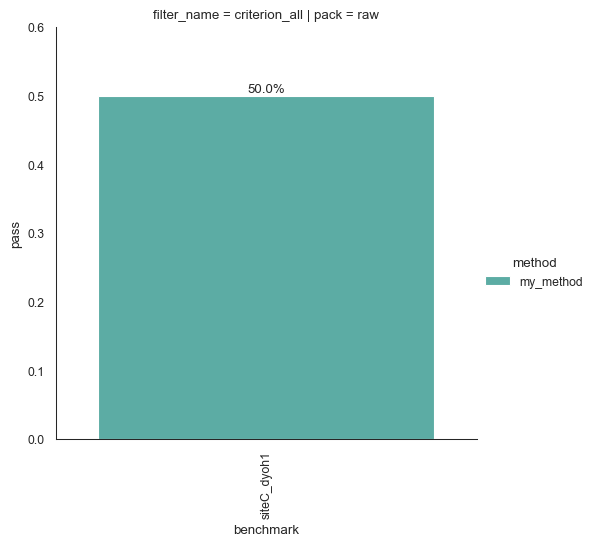

In [7]:
show = melted[melted['filter_name'] == 'criterion_all']
g = sns.catplot(data=show, y='pass', hue='method', x='benchmark', kind='bar', orient='v', row='filter_name', col='pack',
                legend_out=True, ci=None)
bm.show_percents(g)


/tmp/ipykernel_327289/1701205707.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=melted, y='pass', hue='method', x='benchmark', kind='bar', orient='v', row='filter_name', col='pack',


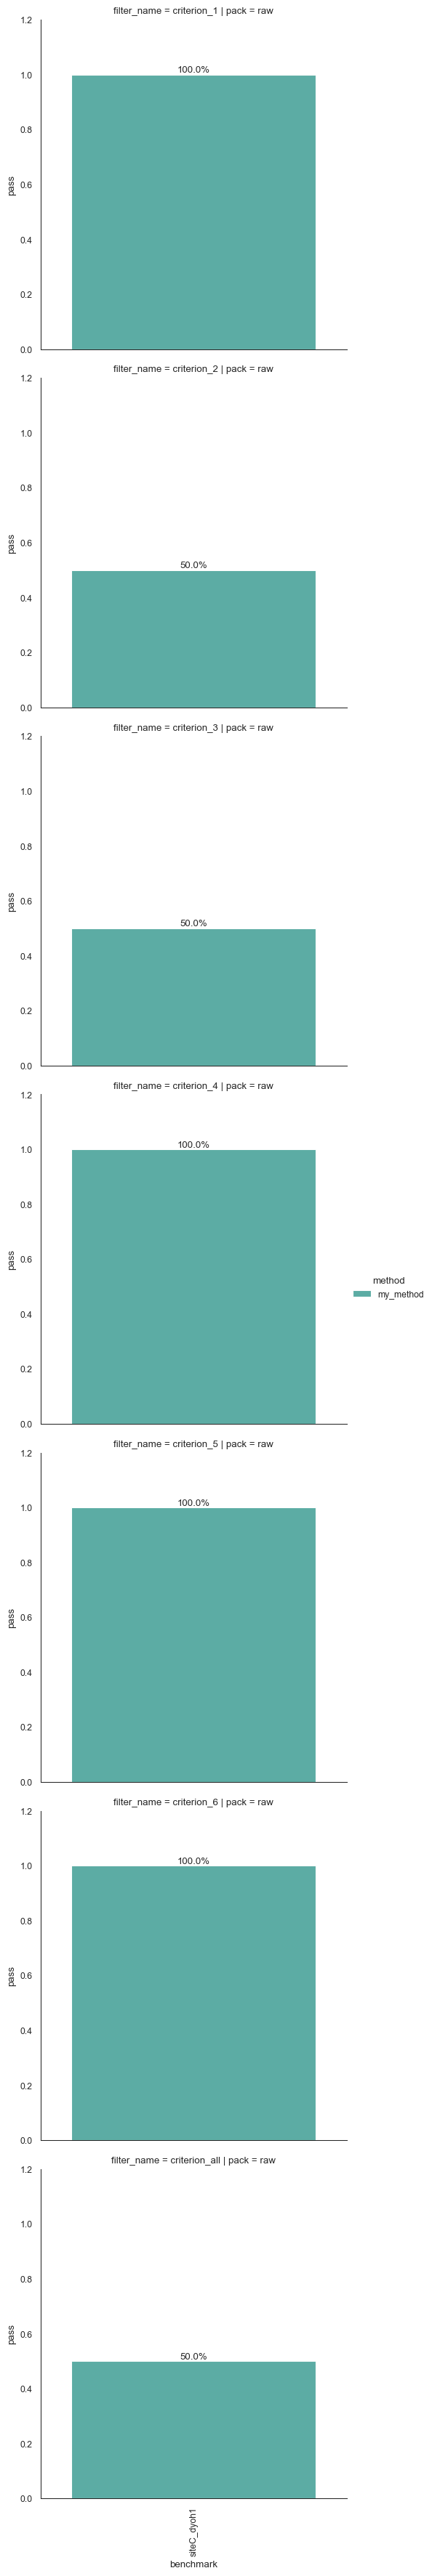

In [8]:
show = melted[melted['filter_name'] == 'criterion_all']
g = sns.catplot(data=melted, y='pass', hue='method', x='benchmark', kind='bar', orient='v', row='filter_name', col='pack',
                legend_out=True, ci=None)
bm.show_percents(g)